In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("weather_data.csv", names=["timestamp", "temperature", "humidity"], parse_dates=["timestamp"])
df.tail()

,timestamp,temperature,humidity
861,2025-09-22 14:01:17,31.3,87.0
862,2025-09-22 14:01:22,31.7,87.0
863,2025-09-22 14:01:27,31.0,87.0
864,2025-09-22 14:01:32,31.3,87.0
865,2025-09-22 14:01:38,31.8,87.0


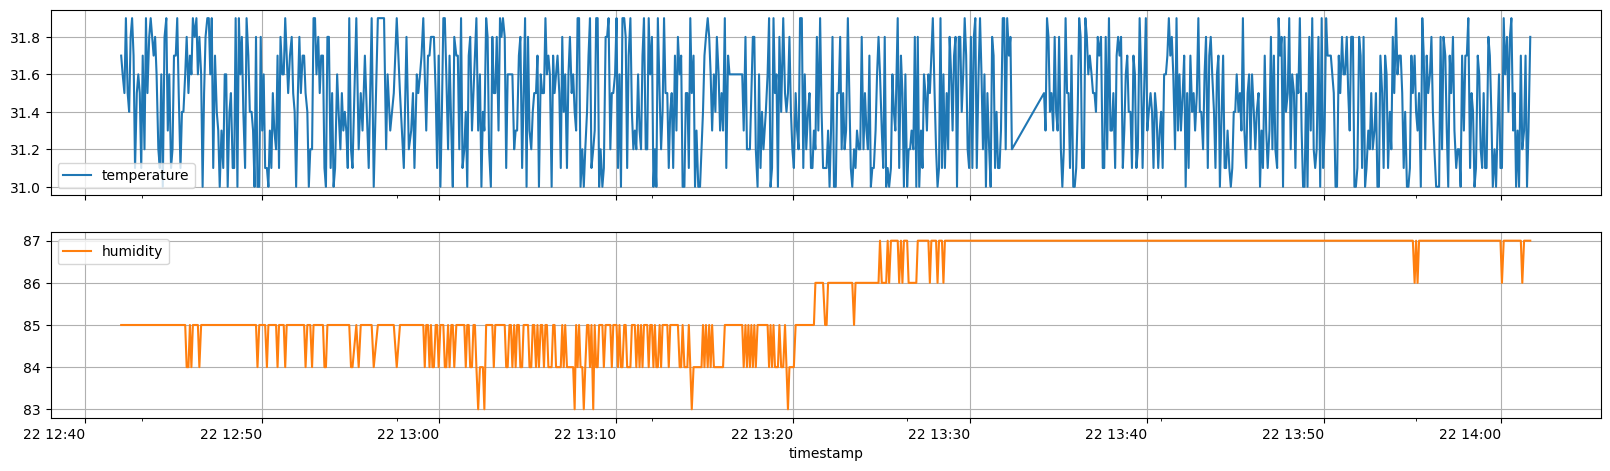

In [119]:
df.plot(
    x="timestamp",
    y=["temperature", "humidity"],
    subplots=True,
    figsize=(20, 6),
    grid=True,
)
plt.xticks(rotation=0)
plt.show()

In [120]:
df.tail(1) # Display the most recent data point

,timestamp,temperature,humidity
865,2025-09-22 14:01:38,31.8,87.0


In [112]:
df.describe()

,timestamp,temperature,humidity
count,800,800.000000,800.000000
mean,2025-09-22 13:19:13.032499712,31.457375,85.700000
min,2025-09-22 12:42:02,31.000000,83.000000
25%,2025-09-22 13:01:12.500000,31.200000,85.000000
50%,2025-09-22 13:19:22.500000,31.500000,85.000000
75%,2025-09-22 13:38:27.249999872,31.700000,87.000000
max,2025-09-22 13:55:52,31.900000,87.000000
std,NaN,0.292108,1.167992


In [121]:
temp_mean = df["temperature"].mean()
temp_std = df["temperature"].std()
humidity_mean = df["humidity"].mean()
humidity_std = df["humidity"].std()

df["temp_anomaly"] = (df["temperature"] > temp_mean + 2*temp_std) | (df["temperature"] < temp_mean - 2*temp_std)
df["humidity_anomaly"] = (df["humidity"] > humidity_mean + 2*humidity_std) | (df["humidity"] < humidity_mean - 2*humidity_std)

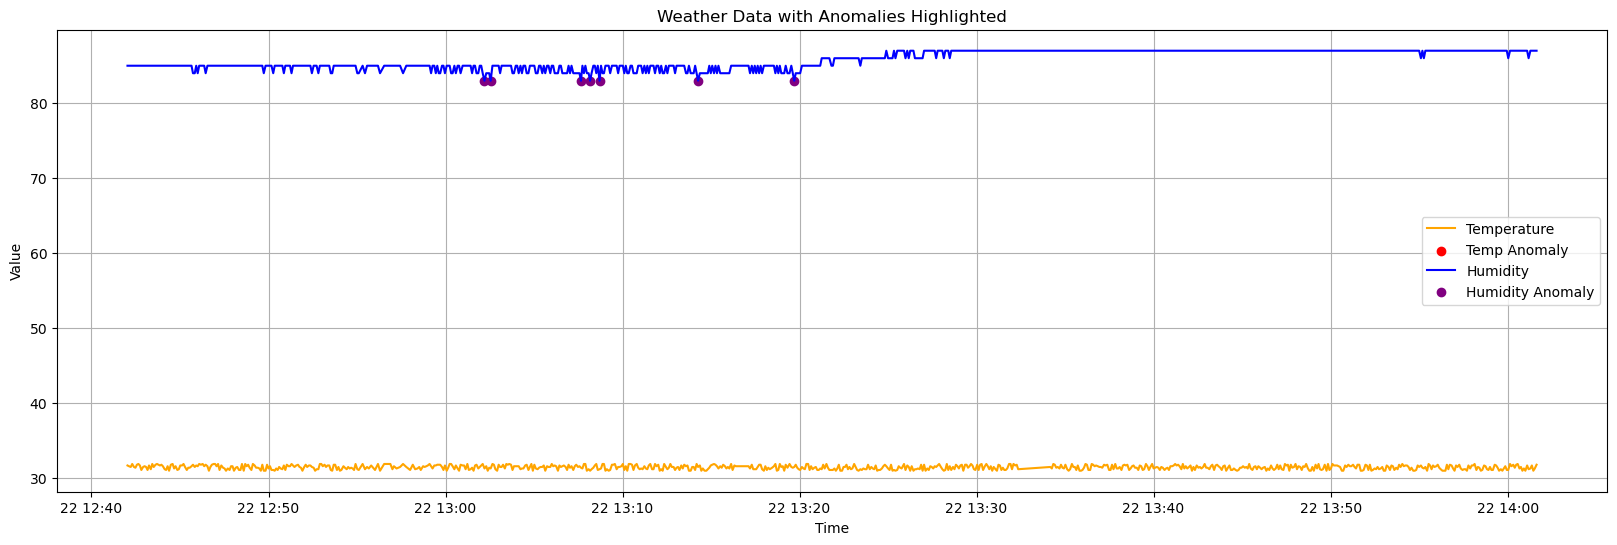

In [122]:
plt.figure(figsize=(20,6))

plt.plot(df["timestamp"], df["temperature"], label="Temperature", color="orange")
plt.scatter(df["timestamp"][df["temp_anomaly"]], df["temperature"][df["temp_anomaly"]], color="red", label="Temp Anomaly")

# Plot humidity
plt.plot(df["timestamp"], df["humidity"], label="Humidity", color="blue")
plt.scatter(df["timestamp"][df["humidity_anomaly"]], df["humidity"][df["humidity_anomaly"]], color="purple", label="Humidity Anomaly")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Weather Data with Anomalies Highlighted")
plt.legend()
plt.grid(True)
plt.show()


<Axes: >

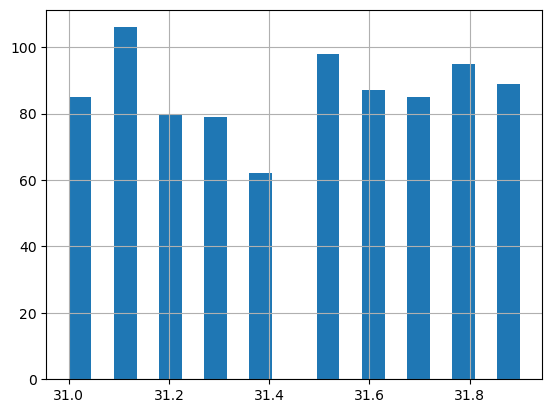

In [123]:
df["temperature"].hist(bins=20)
